In [ ]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!wget imagen1.png https://github.com/juannieu/VPC1/raw/main/TP5/Titanic_in_color.png

--2022-04-19 23:15:51--  http://imagen1.png/
Resolving imagen1.png (imagen1.png)... failed: Name or service not known.
wget: unable to resolve host address ‘imagen1.png’
--2022-04-19 23:15:51--  https://github.com/juannieu/VPC1/raw/main/TP5/Titanic_in_color.png
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/juannieu/VPC1/main/TP5/Titanic_in_color.png [following]
--2022-04-19 23:15:52--  https://raw.githubusercontent.com/juannieu/VPC1/main/TP5/Titanic_in_color.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 649070 (634K) [image/png]
Saving to: ‘Titanic_in_color.png’

Titanic_in_color.pn 100%

1. Construimos un espacio de características basado en color 

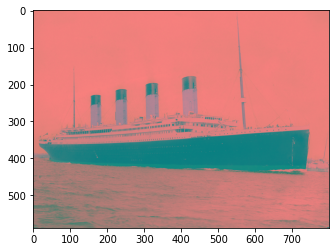

470400


In [ ]:
imgColor=cv.imread('Titanic_in_color.png')
#Transformamos la Imagen a Escala de Grises
imagenLab=cv.cvtColor(imgColor,cv.COLOR_BGR2LAB)
l,a,bc=cv.split(imagenLab)
plt.figure()
plt.imshow(imagenLab)
plt.show()

#print(len(imgColor))
alto=len(imgColor)
ancho=len(imgColor[0])
cantidadPixeles=alto*ancho
print(cantidadPixeles)

#Establecemos el espacio de color
espacio1 = imagenLab.reshape((cantidadPixeles,3))

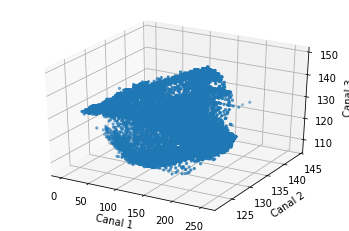

In [ ]:
fig = plt.figure()
axis = fig.add_subplot(1, 1, 1, projection="3d")
#pixel_colors = imagenRGB.reshape((np.shape(imagenRGB)[0]*np.shape(imagenRGB)[1], 3))
axis.scatter(l.flatten(), a.flatten(), bc.flatten(), marker=".")
axis.set_xlabel("Canal 1")
axis.set_ylabel("Canal 2")
axis.set_zlabel("Canal 3")
plt.show()

In [ ]:
imagenRGB=cv.cvtColor(imgColor,cv.COLOR_BGR2RGB)
x=np.zeros((1,5))
y=np.ones((1,5))
print(x)
print(y)
z=np.stack((x,y),axis=1)
print('---')
print(z)

[[0. 0. 0. 0. 0.]]
[[1. 1. 1. 1. 1.]]
---
[[[0. 0. 0. 0. 0.]
  [1. 1. 1. 1. 1.]]]


In [ ]:
imagenRGB=cv.cvtColor(imgColor,cv.COLOR_BGR2RGB)
xF=np.zeros((1,5))
r,g,b=cv.split(imagenRGB)
indiceIter=0
for h in range(0,alto-1):
  for v in range(0,ancho-1):
    pixelR=r[h][v]
    pixelG=g[h][v]
    pixelB=b[h][v]
    x=h
    y=v
    nuevaFila=[pixelR,pixelG,pixelB,x,y]
    #print(xF)
    #print(nuevaFila)
    xF=np.vstack([xF,nuevaFila])
    indiceIter=indiceIter+1

espacio2=xF

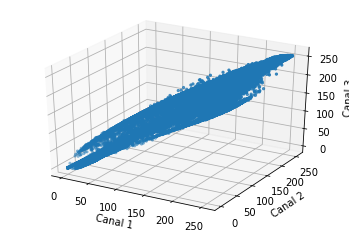

In [ ]:
fig = plt.figure()
axis = fig.add_subplot(1, 1, 1, projection="3d")
#pixel_colors = imagenRGB.reshape((np.shape(imagenRGB)[0]*np.shape(imagenRGB)[1], 3))
axis.scatter(r.flatten(), g.flatten(), b.flatten(), marker=".")
axis.set_xlabel("Canal 1")
axis.set_ylabel("Canal 2")
axis.set_zlabel("Canal 3")
plt.show()

Usamos Kmeans con el primer espacio

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


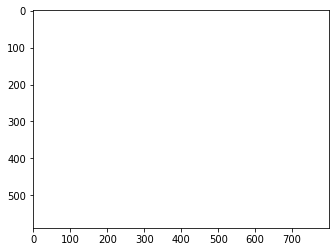

In [ ]:
espacio1=np.float32(espacio1)
criterios = (cv.TERM_CRITERIA_MAX_ITER + cv.TERM_CRITERIA_EPS, 10, 1.0)
K = 10
compacta1, etiquetas1, clusters1 = cv.kmeans(espacio1, K, None, criterios, 10, cv.KMEANS_RANDOM_CENTERS)
#Preparamos la imagen
imagen_espacio_1=clusters1[etiquetas1.flatten()]
imagen_espacio_1=imagen_espacio_1.reshape((imgColor.shape))

plt.figure()
plt.imshow(imagen_espacio_1)
plt.show()

In [ ]:
espacio2=np.float32(espacio2)
criteria = (cv.TERM_CRITERIA_MAX_ITER + cv.TERM_CRITERIA_EPS, 10, 1.0)
K = 10
compacta2, etiquetas2, clusters2 = cv.kmeans(espacio2, K, None, criterios, 10, cv.KMEANS_RANDOM_CENTERS)
imagen_espacio_2=clusters2[etiquetas2.flatten()]
imagen_espacio_2=imagen_espacio_2.reshape((imgColor.shape))

plt.figure()
plt.imshow(imagen_espacio_2)
plt.show()

ValueError: ignored